<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dota-2:-Win-Probability-Prediction" data-toc-modified-id="Dota-2:-Win-Probability-Prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dota 2: Win Probability Prediction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Чтение-информации-о-матчах" data-toc-modified-id="Чтение-информации-о-матчах-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Чтение информации о матчах</a></span></li><li><span><a href="#Пример-чтения-файла-с-признаками" data-toc-modified-id="Пример-чтения-файла-с-признаками-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Пример чтения файла с признаками</a></span></li></ul></li></ul></li><li><span><a href="#Метрика-качества" data-toc-modified-id="Метрика-качества-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Метрика качества</a></span></li><li><span><a href="#Руководство-по-решению" data-toc-modified-id="Руководство-по-решению-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Руководство по решению</a></span><ul class="toc-item"><li><span><a href="#Подход-1:-градиентный-бустинг-&quot;в-лоб&quot;" data-toc-modified-id="Подход-1:-градиентный-бустинг-&quot;в-лоб&quot;-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Подход 1: градиентный бустинг "в лоб"</a></span></li></ul></li><li><span><a href="#Отчет.-часть-1" data-toc-modified-id="Отчет.-часть-1-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Отчет. часть 1</a></span><ul class="toc-item"><li><span><a href="#Подход-2:-логистическая-регрессия" data-toc-modified-id="Подход-2:-логистическая-регрессия-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Подход 2: логистическая регрессия</a></span></li><li><span><a href="#Подход-2:-логистическая-регрессия" data-toc-modified-id="Подход-2:-логистическая-регрессия-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Подход 2: логистическая регрессия</a></span></li><li><span><a href="#prediction-on-the-test-dataset" data-toc-modified-id="prediction-on-the-test-dataset-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>prediction on the test dataset</a></span></li></ul></li><li><span><a href="#Отчет.-часть-2" data-toc-modified-id="Отчет.-часть-2-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Отчет. часть 2</a></span></li><li><span><a href="#Проверка-финальной-модели" data-toc-modified-id="Проверка-финальной-модели-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Проверка финальной модели</a></span><ul class="toc-item"><li><span><a href="#Что-еще-попробовать?" data-toc-modified-id="Что-еще-попробовать?-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Что еще попробовать?</a></span></li></ul></li><li><span><a href="#Про-задачу-и-финальное-задание" data-toc-modified-id="Про-задачу-и-финальное-задание-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Про задачу и финальное задание</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Почему-именно-такая-задача?" data-toc-modified-id="Почему-именно-такая-задача?-1.6.0.1"><span class="toc-item-num">1.6.0.1&nbsp;&nbsp;</span>Почему именно такая задача?</a></span></li><li><span><a href="#Задание-слишком-простое.-Что-еще-можно-сделать?" data-toc-modified-id="Задание-слишком-простое.-Что-еще-можно-сделать?-1.6.0.2"><span class="toc-item-num">1.6.0.2&nbsp;&nbsp;</span>Задание слишком простое. Что еще можно сделать?</a></span></li><li><span><a href="#Где-взяли-данные?" data-toc-modified-id="Где-взяли-данные?-1.6.0.3"><span class="toc-item-num">1.6.0.3&nbsp;&nbsp;</span>Где взяли данные?</a></span></li><li><span><a href="#Как-сформировали-выборку?" data-toc-modified-id="Как-сформировали-выборку?-1.6.0.4"><span class="toc-item-num">1.6.0.4&nbsp;&nbsp;</span>Как сформировали выборку?</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Dota 2: Win Probability Prediction

**Problem**: Based on the first 5 minutes of the game, predict which team will win: Radiant or Dire

**Description of features in the table**

- `match_id`: id of the match in the dataset
- `start_time`: match start time (unixtime)
- `lobby_type`: type of room in which players gather (explained in `dictionaries/lobbies.csv`)
- Sets of traits for each player (players of the Radiant team - prefix `rN`, Dire - `dN`):
    - `r1_hero`: player's hero (explanation in dictionaries/heroes.csv)
    - `r1_level`: maximum hero level reached (in the first 5 minutes of the game)
    - `r1_xp`: max experience gained
    - `r1_gold`: hero value achieved
    - `r1_lh`: number of units killed
    - `r1_kills`: number of killed players
    - `r1_deaths`: number of hero deaths
    - `r1_items`: number of purchased items
- Signs of the event "first blood" (first blood). If the event "first blood" did not have time to occur in the first 5 minutes, then the signs take on the missing value
    - `first_blood_time`: first blood game time
    - `first_blood_team`: the team that made the first blood (0 - Radiant, 1 - Dire)
    - `first_blood_player1`: player involved in the event
    - `first_blood_player2`: second player involved in the event
- Signs for each command (prefixes `radiant_` and `dire_`)
    - `radiant_bottle_time`: time when the team first acquired the item "bottle"
    - `radiant_courier_time`: time to purchase item "courier"
    - `radiant_flying_courier_time`: time to purchase item "flying_courier"
    - `radiant_tpscroll_count`: number of "tpscroll" items in the first 5 minutes
    - `radiant_boots_count`: number of "boots" items
    - `radiant_ward_observer_count`: number of "ward_observer" items
    - `radiant_ward_sentry_count`: number of "ward_sentry" items
    - `radiant_first_ward_time`: time when the command set the first "observer", i.e. an object that allows you to see part of the playing field
- The result of the match (these fields are not in the test sample, because they contain information that goes beyond the first 5 minutes of the match)
    - `duration`: duration
    - `radiant_win`: 1 if the Radiant team won, 0 otherwise
    - Status of towers and barracks at the end of the match (see description of dataset fields)
        - `tower_status_radiant`
        - `tower_status_dire`
        - `barracks_status_radiant`
        - `barracks_status_dire`

#### Чтение информации о матчах

Информация о матчах записана в сжатом текстовом файле `matches.jsonlines.bz2`, каждая строчка которого содержит объект в формате [JSON](https://ru.wikipedia.org/wiki/JSON). Запись в формате JSON преобразуется в python-объект при помощи стандартного модуля `json`. Пример чтения матчей:

In [44]:
import time
import datetime
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#### Пример чтения файла с признаками

In [104]:
features = pd.read_csv('datasets/features.csv', index_col='match_id')
features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [105]:
# Removal of start_time column as uninformative
# Removal of columns associated with the results of the match

features.drop([
    "start_time",
    "duration",
    "tower_status_radiant",
    "tower_status_dire",
    "barracks_status_radiant",
    "barracks_status_dire",
], axis=1, inplace=True)

features.head()

,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,...,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,radiant_win
match_id,,,,,,,,,,,,,,,,,,,,,
0,7,11,5,2098,1489,20,0,0,7,67,...,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0,1
1,0,42,4,1188,1033,9,0,1,12,49,...,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0,1
2,7,33,4,1319,1270,22,0,0,12,98,...,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0,0
3,1,29,4,1779,1056,14,0,0,5,30,...,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0,0
4,7,13,4,1431,1090,8,1,0,8,27,...,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0,0


## Метрика качества

В качестве метрики качества мы будем использовать площадь под ROC-кривой (AUC-ROC). Обратите внимание, что AUC-ROC — это метрика качества для алгоритма, выдающего оценки принадлежности первому классу. Оба алгоритма, которые будут использоваться в проекте — градиентный бустинг, и логистическая регрессия — умеют выдавать такие оценки. Для этого нужно получать предсказания с помощью функции predict_proba. Она возвращает два столбца: первый содержит оценки принадлежности нулевому классу, второй — первому классу. Вам нужны значения из второго столбца:
```python
pred = clf.predict_proba(X_test)[:, 1]
```

## Руководство по решению

Вам необходимо провести описанные ниже два этапа исследования, написать по результатам каждого этапа небольшой отчет (ниже указаны вопросы, ответы на которые должны содержаться в отчете), и предоставить для ревью данный отчет и код, с помощью которого вы выполнили задание.

**Обратите внимание:** высокое качество работы на кросс-валидации (близкое к 100%) — это в первую очередь повод задуматься о том, правильно ли вы обучаете модель. Возможно, вы заглядываете в будущее или настраиваетесь на неправильном наборе признаков.

### Подход 1: градиентный бустинг "в лоб"
Один из самых универсальных алгоритмов, изученных в нашем курсе, является градиентный бустинг. Он не очень требователен к данным, восстанавливает нелинейные зависимости, и хорошо работает на многих наборах данных, что и обуславливает его популярность. Вполне разумной мыслью будет попробовать именно его в первую очередь.

1. Считайте таблицу с признаками из файла features.csv с помощью кода, приведенного выше. Удалите признаки, связанные с итогами матча (они помечены в описании данных как отсутствующие в тестовой выборке).
2. Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений. Много ли пропусков в данных? Запишите названия признаков, имеющих пропуски, и попробуйте для любых двух из них дать обоснование, почему их значения могут быть пропущены.
3. Замените пропуски на нули с помощью функции fillna(). На самом деле этот способ является предпочтительным для логистической регрессии, поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание. Для деревьев часто лучшим вариантом оказывается замена пропуска на очень большое или очень маленькое значение — в этом случае при построении разбиения вершины можно будет отправить объекты с пропусками в отдельную ветвь дерева. Также есть и другие подходы — например, замена пропуска на среднее значение признака. Мы не требуем этого в задании, но при желании попробуйте разные подходы к обработке пропусков и сравните их между собой.
3. Какой столбец содержит целевую переменную? Запишите его название.
4. Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), не забудьте перемешать при этом выборку (shuffle=True), поскольку данные в таблице отсортированы по времени, и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества. Оцените качество градиентного бустинга (GradientBoostingClassifier) с помощью данной кросс-валидации, попробуйте при этом разное количество деревьев (как минимум протестируйте следующие значения для количества деревьев: 10, 20, 30). Долго ли настраивались классификаторы? Достигнут ли оптимум на испытанных значениях параметра n_estimators, или же качество, скорее всего, продолжит расти при дальнейшем его увеличении?

##### Что указать в отчете
В отчете по данному этапу вы должны ответить на следующие вопросы:
1. Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?
2. Как называется столбец, содержащий целевую переменную?
3. Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти ниже по тексту. Какое качество при этом получилось? Напомним, что в данном задании мы используем метрику качества AUC-ROC.
4. Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?

In [106]:
 #printing columns names with empty spaces and fill with zeros
amount_na = len(features) - features.count().sort_values()
amount_na = amount_na[amount_na>0]

print("Total raws:", len(features))
display(amount_na)

features.fillna(0, inplace=True)

Total raws: 97230


first_blood_player2            43987
radiant_flying_courier_time    27479
dire_flying_courier_time       26098
first_blood_time               19553
first_blood_team               19553
first_blood_player1            19553
dire_bottle_time               16143
radiant_bottle_time            15691
radiant_first_ward_time         1836
dire_first_ward_time            1826
radiant_courier_time             692
dire_courier_time                676
dtype: int64

In [107]:
X_train = features.drop("radiant_win", axis=1)
y_train = features["radiant_win"]

In [108]:
start_time = datetime.datetime.now()
grid ={'n_estimators': range(10,100,10)} 

kf = KFold(n_splits=5, shuffle=True, random_state=25)
clf = GradientBoostingClassifier(verbose=0, random_state=25, learning_rate=1)

gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=kf, n_jobs=-1)
gs.fit(X_train, y_train)

print ('Time elapsed {}'.format( datetime.datetime.now() - start_time))

Time elapsed 0:07:21.452952


In [109]:
gs.cv_results_

{'mean_fit_time': array([10.07162094, 20.33927608, 31.73520775, 45.23968711, 59.12332721,
        71.41530027, 84.87212796, 98.30572429, 97.79922738]),
 'std_fit_time': array([0.10513529, 0.22921477, 0.70887382, 0.56405288, 1.08880177,
        0.93207528, 0.6731181 , 1.69481482, 5.0769812 ]),
 'mean_score_time': array([0.05141134, 0.0603282 , 0.07521691, 0.07483349, 0.0910223 ,
        0.10142794, 0.1092258 , 0.11288586, 0.0934011 ]),
 'std_score_time': array([0.00873194, 0.00500708, 0.00856747, 0.00194156, 0.00363331,
        0.00792002, 0.00448988, 0.01067106, 0.00769137]),
 'param_n_estimators': masked_array(data=[10, 20, 30, 40, 50, 60, 70, 80, 90],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 40},
  {'n_estimators': 50},
  {'n_estimators': 60},
  {'n_estimators': 70},
  {'

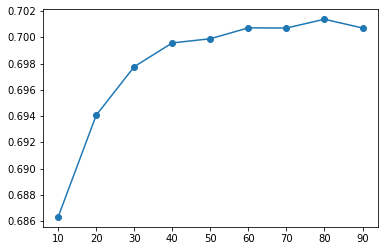

In [110]:
plt.plot(grid['n_estimators'], gs.cv_results_['mean_test_score'], '-o')
plt.show()

In [111]:
gs.cv_results_['mean_fit_time'][2] #время, затраченное для 30 деревьев

31.735207748413085

## Отчет. часть 1
1. Признаки, имеющие пропуски в таблице: 
        first_blood_time
        first_blood_team
        first_blood_player1
        first_blood_player2
        radiant_bottle_time
        radiant_courier_time
        radiant_flying_courier_time
        radiant_first_ward_time
        dire_bottle_time
        dire_courier_time
        dire_flying_courier_time
        dire_first_ward_time
    
    События, связанные с первой кровью (относятся к первым четырем признакам в списке выше), имеют пропуски, если они произошли после 5 минут после начала игры.    

2. Целевая переменная в столбце "radiant_win"
3. Для градиентного бустинга с 30 деревьями потребовалось 40 с (при прямом loop-переборе - больше 2 мин). Качество модели на метрике AUC-ROC составило 0.695.
4. Смысла увеличивать количество деревьев нет, так как качество не увеличивается при переходе от 20 до 30 деревьев. Однако если все-так хочется увеличить количество деревьев, то для сокращения времени работы алгоритма можно уменьшить их глубину.

### Подход 2: логистическая регрессия

Линейные методы работают гораздо быстрее композиций деревьев, поэтому воспользуемся именно ими для ускорения анализа данных. Будем использовать логистическую регрессию.

### Подход 2: логистическая регрессия

Линейные методы работают гораздо быстрее композиций деревьев, поэтому кажется разумным воспользоваться именно ими для ускорения анализа данных. Одним из наиболее распространенных методов для классификации является логистическая регрессия.

**Важно:** не забывайте, что линейные алгоритмы чувствительны к масштабу признаков! Может пригодиться sklearn.preprocessing.StandartScaler.

1. Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. Подберите при этом лучший параметр регуляризации (C). Какое наилучшее качество у вас получилось? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
2. Среди признаков в выборке есть категориальные, которые мы использовали как числовые, что вряд ли является хорошей идеей. Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Изменилось ли качество? Чем вы можете это объяснить?
3. На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, сколько различных идентификаторов героев существует в данной игре (вам может пригодиться фукнция unique или value_counts).
4. Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; минус единице, если i-й герой играл за команду Dire. Ниже вы можете найти код, который выполняет данной преобразование. Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.
5. Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить?
6. Постройте предсказания вероятностей победы команды Radiant для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). Убедитесь, что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между собой (т.е. что модель не получилась константной).

##### Что указать в отчете
В отчете по данному этапу вы должны ответить на следующие вопросы:
1. Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
2. Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?
3. Сколько различных идентификаторов героев существует в данной игре?
4. Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?
5. Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?

In [112]:
# масштабируем данные
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

Time elapsed 0:00:16.157309


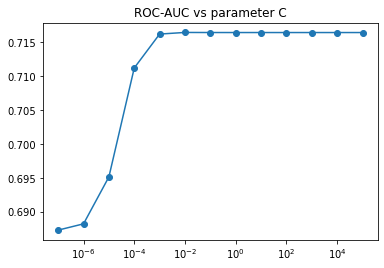

Time elapsed 0:00:16.392379
best C:  0.01
maximum quality:  0.716
mean fit time for each C value, s:  1.729


In [113]:
start_time = datetime.datetime.now()

grid_С = {'C': np.power(10.0, np.arange(-7, 6))}

kf = KFold(n_splits=5, shuffle=True, random_state=25) # разбиение
clf = LogisticRegression(penalty='l2', max_iter=10000, random_state=25)

gs2 = GridSearchCV(clf, grid_С, scoring='roc_auc', cv=kf, n_jobs=-1)
gs2.fit(X_train, y_train)
print ('Time elapsed {}'.format( datetime.datetime.now() - start_time))

plt.plot(grid_С['C'], gs2.cv_results_['mean_test_score'], '-o')

plt.xscale("log")
plt.yscale("linear")
plt.title("ROC-AUC vs parameter C")
plt.show()

i = np.argmax(gs2.cv_results_['mean_test_score'])
print ('Time elapsed {}'.format( datetime.datetime.now() - start_time))
print("best C: ", grid_С['C'][i])
print("maximum quality: ", round(gs2.cv_results_['mean_test_score'][i], 3))
print("mean fit time for each C value, s: ", round(np.mean(gs2.cv_results_['mean_fit_time']), 3))

The value of the AUC-ROC metrics is approximately the same as when using gradient boosting. This means that the dependancy between the features and the target variable is linear, hence the logistic regression is sufficient to build the model. Also logistic regression works much faster. (1.6 s vs 36 s for gradient boosting)

Among the features in the sample, there are categorical ones, which we used as numerical ones, which is hardly a good idea. There are eleven categorical features in this problem: lobby_type and r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Let's remove them from the sample, and cross-validate for logistic regression on a new sample with the selection of the best regularization parameter.

In [114]:
cat = [col for col in features.columns if ('hero' in col) or ('lobby' in col)]
X_train = X_train.drop(cat, axis=1)

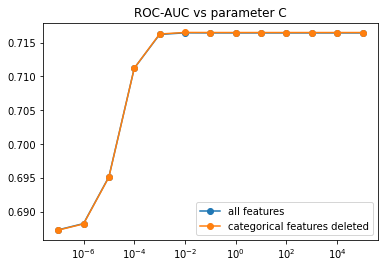

Time elapsed 0:00:15.234159
best C:  0.01
maximum quality:  0.717
mean fit time for each C value, s:  1.582


In [115]:
start_time = datetime.datetime.now()

kf = KFold(n_splits=5, shuffle=True, random_state=25) 
clf3 = LogisticRegression(penalty='l2', max_iter=10000, random_state=25)

gs3 = GridSearchCV(clf3, grid_С, scoring='roc_auc', cv=kf, n_jobs=-1)
gs3.fit(X_train, y_train)

plt.plot(grid_С['C'], gs2.cv_results_['mean_test_score'], '-o', label="all features")
plt.plot(grid_С['C'], gs3.cv_results_['mean_test_score'], '-o', label="categorical features deleted")
plt.title("ROC-AUC vs parameter C")
plt.xscale("log")
plt.legend()
plt.show()

i = np.argmax(gs3.cv_results_['mean_test_score'])
print ('Time elapsed {}'.format( datetime.datetime.now() - start_time))
print("best C: ", grid_С['C'][i])
print("maximum quality: ", round(gs3.cv_results_['mean_test_score'][i], 3))
print("mean fit time for each C value, s: ", round(np.mean(gs3.cv_results_['mean_fit_time']), 3))

After categorical features removed, the quality indicator did not change, which means that they did not affect the operation of the model and inn the end the model recognizes them as noise and does not take them into account when predicting.

Let's use the "bag-of-words" approach to encode information about the characters. Let the total number of heroes in the game be N. Let's form N signs, while the i-th one will be equal to zero if the i-th hero did not participate in the match; 1 if the i-th hero played for the Radiant team; -1 if the i-th hero played for the Dire team.

In [116]:
heroes = pd.read_csv("datasets/heroes.csv")
display(heroes)
N = heroes.nunique()[0]
print("No. of possible heroes in Dota2 is", N)

,id,localized_name,name
0,1,Anti-Mage,antimage
1,2,Axe,axe
2,3,Bane,bane
3,4,Bloodseeker,bloodseeker
4,5,Crystal Maiden,crystal_maiden
...,...,...,...
107,110,Phoenix,phoenix
108,105,Techies,techies
109,111,Oracle,oracle
110,112,Winter Wyvern,winter_wyvern


No. of possible heroes in Dota2 is 112


In [117]:
features.index

Int64Index([     0,      1,      2,      3,      4,      5,      8,      9,
                11,     12,
            ...
            114396, 114397, 114399, 114400, 114401, 114402, 114403, 114404,
            114405, 114406],
           dtype='int64', name='match_id', length=97230)

In [118]:
X_pick = np.zeros((features.shape[0], N))

for i, match_id in enumerate(features.index):
    for p in range(5):
        X_pick[i, features.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, features.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

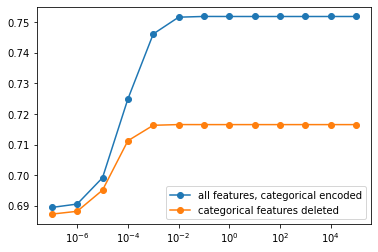

Time elapsed 0:00:57.162790
best C:  0.1
maximum quality:  0.752
mean fit time for each C value, s:  6.293


In [119]:
# Adding information about heroes to characteristics
X_full = np.concatenate((X_train, X_pick), axis=1)

start_time = datetime.datetime.now()

kf = KFold(n_splits=5, shuffle=True, random_state=25) # разбиение
clf4 = LogisticRegression(penalty='l2', max_iter=10000, random_state=25)

gs4 = GridSearchCV(clf4, grid_С, scoring='roc_auc', cv=kf, n_jobs=-1)
gs4.fit(X_full, y_train)

plt.plot(grid_С['C'], gs4.cv_results_['mean_test_score'], '-o', label="all features, categorical encoded")
plt.plot(grid_С['C'], gs3.cv_results_['mean_test_score'], '-o', label="categorical features deleted")
plt.xscale("log")
plt.legend()
plt.show()

i = np.argmax(gs4.cv_results_['mean_test_score'])
print ('Time elapsed {}'.format( datetime.datetime.now() - start_time))
print("best C: ", grid_С['C'][i])
print("maximum quality: ", round(gs4.cv_results_['mean_test_score'][i], 3))
print("mean fit time for each C value, s: ", round(np.mean(gs4.cv_results_['mean_fit_time']), 3))

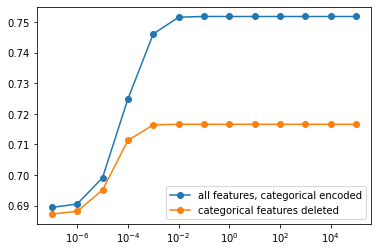

Time elapsed 0:00:59.851986
best C:  0.1
maximum quality:  0.752
mean fit time for each C value, s:  6.429


In [102]:
# Adding information about heroes to characteristics
X_full = np.concatenate((X_train, X_pick), axis=1)

start_time = datetime.datetime.now()

kf = KFold(n_splits=5, shuffle=True, random_state=25) # разбиение
clf4 = LogisticRegression(penalty='l2', max_iter=10000, random_state=25)

gs4 = GridSearchCV(clf4, grid_С, scoring='roc_auc', cv=kf, n_jobs=-1)
gs4.fit(np.delete(X_full,0,axis=1), y_train)

plt.plot(grid_С['C'], gs4.cv_results_['mean_test_score'], '-o', label="all features, categorical encoded")
plt.plot(grid_С['C'], gs3.cv_results_['mean_test_score'], '-o', label="categorical features deleted")
plt.xscale("log")
plt.legend()
plt.show()

i = np.argmax(gs4.cv_results_['mean_test_score'])
print ('Time elapsed {}'.format( datetime.datetime.now() - start_time))
print("best C: ", grid_С['C'][i])
print("maximum quality: ", round(gs4.cv_results_['mean_test_score'][i], 3))
print("mean fit time for each C value, s: ", round(np.mean(gs4.cv_results_['mean_fit_time']), 3))

After adding information about the heroes, the quality of the model increased, which can be explained by the fact that after encoding, information about the heroes is also processed by the model and used to build a prediction, since this parameter also matters, whereas before that it was a noise.

### prediction on the test dataset

In [137]:
features_test = pandas.read_csv('datasets/features_test.csv', index_col='match_id')

#printing columns names with empty spaces and fill with zeros
features_test.drop("start_time", axis=1, inplace=True)
features_test.fillna(0, inplace=True)
display(features_test.head())

,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
6,0,93,4,1103,1089,8,0,1,9,102,...,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
7,1,20,2,556,570,1,0,0,9,6,...,2,-29.0,168.0,-54.0,0.0,3,2,2,1,16.0
10,1,112,2,751,808,1,0,0,13,26,...,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
13,1,27,3,708,903,1,1,1,11,91,...,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
16,1,39,4,1259,661,4,0,0,9,93,...,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0


In [139]:
X_test = features_test.drop(cat, axis=1)
X_test = scaler.fit_transform(X_test) 

X_test_pick = np.zeros((features_test.shape[0], N))

for i, match_id in enumerate(features_test.index):
    for p in range(5):
        X_test_pick[i, features_test.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_test_pick[i, features_test.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
        
X_test = np.concatenate((X_test, X_test_pick), axis=1)

model = LogisticRegression(penalty='l2', C=0.1, max_iter=10000, random_state=25)
model.fit(X_full, y_train)
preds = pd.Series(model.predict_proba(X_test)[:, 1])
preds.describe()

count    17177.000000
mean         0.518208
std          0.221041
min          0.008499
25%          0.346578
50%          0.523185
75%          0.692246
max          0.996619
dtype: float64

## Отчет. часть 2
1. Качество получилось немного выше, 0.716. Хоть разница и небольшая, есть значительный прогресс во времени вычислений (примерно 1.5 с на каждое значение параметра при вычислении для масштабированных признаков. Для немасштабированных вычисления почему-то дольше, но все равно быстрее чем для градиентного бустинга).
2. После удаления категориальных признаков качество то же самое (0.716). Видимо, они не вносят весомый вклад.
3. 112 идентификаторов героев (хотя в данном датасете представлены только 108)
4. После добавления "мешка слов" по героям к числовым признакам качество улучшилось, с 0.71 до 0.75. Это объясняется тем, что выбор персонажа, его природные характеристики, влияют в конечном счете на исход игры.
5. Минимальное значение прогноза на тестовой выборке - 0.008, максимальное - 0.997.

## Проверка финальной модели

После того как вы провели все эксперименты и выбрали лучшую модель, можете проверить ее качество на тестовых матчах. Выборка тестовых матчей собрана в файле `matches_test.jsonlines.bz2`. В отличие от основного набора матчей, в тестовых матчах есть только та информация, которая известна на момент первых 5 игровых минут, результат матча — неизвестен. Таблица признаков для тестовых матчей — `features_test.csv`.

Для всех матчей из тестового набора предскажите вероятность победы Radiant, запишите предсказания в CSV файл с колонками `match_id` (идентификатор матча) и `radiant_win` — предсказанная вероятность. Файл с предсказаниями должен выглядеть примерно следующим образом:

```
match_id,radiant_win
1,0.51997370502
4,0.51997370502
15,0.51997370502
...
```

Отправьте решение на Kaggle в соревнование: Dota 2: Win Probability Prediction.

Ссылка на соревнование: [Dota 2: Win Probability Prediction](https://kaggle.com/join/coursera_ml_dota2_contest)

### Что еще попробовать?

Разумеется, можно попробовать еще очень много разных идей, которые помогут вам получить еще более высокий результат на kaggle. Вот лишь несколько возможных вариантов:
1. Про каждого из игроков есть достаточно много показателей: максимальный опыт, число смертей и т.д. (см. список выше). Можно попробовать просуммировать или усредних их, получив агрегированные показатели для всей команды.
2. В сырых данных (файл matches.jsonlines.bz2) содержится очень много информации, которую мы пока не использовали. Вы можете, например, составить "мешки слов" для покупок различных предметов (то есть кодировать информацию о том, сколько раз каждая команда покупала тот или иной предмет). Обратите внимание, что при этом вы можете получить слишком большое количество признаков, для которых может иметь смысл сделать понижение размерности с помощью метода главных компонент.
3. Можно сформировать признаки про изменения способностей героев в течение матча (ability_upgrades).
4. В этом задании используются только градиентный бустинг и логистическая регрессия — но ведь мы изучали и другие модели! Можно попробовать метод k ближайших соседей, SVM, случайный лес и так далее.

## Про задачу и финальное задание

#### Почему именно такая задача?

- Публикация реальных данных из индустриальных задач — очень смелый шаг для компании. Мало кто (даже Яндекс) может на такое пойти. Гораздо проще (а порой и интереснее) воспользоваться данными из открытых источников.
- Публичные датасеты из интернета для решения реальных бизнес-задач мало пригодны, собственно поэтому они и лежат в открытом доступе.
- Мы предпочли сделать игрушечную задачу на реальных данных, вместо реальной задачи на игрушечных данных.
- Задача прогнозирования победы — игрушечная, но вот лишь небольшой перечень реальных задач, на которые она похожа:
    - предсказания вероятности покупки услуги клиентом банка
    - предсказание вероятности оттока клиента к другому поставщику услуг
    - ... (подумайте над другими примерами)

#### Задание слишком простое. Что еще можно сделать?

Ответить на вопрос: какое минимальное число минут матча необходимо знать, для того чтобы в 80% матчей верно угадывать победившую сторону? А с точностью 90%? Дайте свой ответ на этот вопрос и докажите что такой точности действительно можно достичь, построив модель и качественно провалидировав ее. Насколько матчи в игре Dota 2 предсказуемы?

Напишите об этом статью, расскажите всем, и приходите к нам на собеседование.

#### Где взяли данные?

Набор данных был сделан на основе выгрузки [YASP 3.5 Million Data Dump](http://academictorrents.com/details/5c5deeb6cfe1c944044367d2e7465fd8bd2f4acf) реплеев матчей Dota 2 с сайта [yasp.co](http://yasp.co/). За выгрузку огромное спасибо Albert Cui and Howard Chung and Nicholas Hanson-Holtry. Лицензия на выгрузку: CC BY-SA 4.0.

#### Как сформировали выборку?

Оригинальная выгрузка матчей была очищена, в предложенном наборе присутствуют матчи:
  - сыгранные с 2015-05-01 до 2015-12-17
  - длительностью не менее 15 минут
  - убраны матчи с неполной информацией (например: отсутвует информация про игроков)

Из всего датасета 15% случайных записей были выделены в тестовое множество.

Для того чтобы размотивировать участников соревнования на Kaggle занимать высокие места читерскими методами (например, скачав оригинальный набор данных и подсмотрев ответы на тестовом множестве матчей), мы произвели минимальную обфускацию данных, т.е. немного запутали датасет:
   - поменяли идентификаторы матчей
   - время начала каждого матча сдвинули на значение случайной величины, нормально распределенной со стандартным отклонением в 1 сутки